Import Pakages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import os
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler

Read Files

In [2]:
card = 'JB1UJS07'
device = 'VA2007'

In [111]:
usecols = ['EQP']
pd.read_excel('C:/Users/Kevin_Liu/project/data/PA5129/配件/JB1UJS07.xlsx', skiprows = [0, 1])

,ProbeCard,Action,Attr Name,Old Value,New Value,Old Status Desc,New Status Desc,EQP,維修原因,維修動作,...,P/C預計回廠時間,(借出 歸回 其他 ),已使用Die數,總累積使用Die數,Tip Length,Coplanarity,備註,最後修改者,最後修改時間,執行狀況
0,JB1UJS07,ChangeStatus,NaN,NaN,NaN,正常在庫,可使用,NaN,NaN,NaN,...,NaT,NaN,88557,307434,10.11,9.0,NaN,17674 - 林佑倉,2022-01-01 07:42:33,NaN
1,JB1UJS07,ModifyAttr,LOCATE,4F01-05,KT6373-147,NaN,可使用,NaN,NaN,NaN,...,NaT,NaN,88557,307434,10.11,9.0,NaN,17674 - 林佑倉,2022-01-01 07:42:34,NaN
2,JB1UJS07,MoveIn,NaN,NaN,NaN,可使用,使用中,T6373-147,NaN,NaN,...,NaT,NaN,88557,307434,10.11,9.0,NaN,MES-20021 -,2022-01-01 08:14:37,NaN
3,JB1UJS07,ModifyAttr,TouchDown_Used,88557,89300,NaN,使用中,NaN,NaN,NaN,...,NaT,NaN,89300,308177,10.11,9.0,NaN,EDA-00000 -,2022-01-01 11:20:38,NaN
4,JB1UJS07,ModifyAttr,TouchDown_Used,89300,90020,NaN,使用中,NaN,NaN,NaN,...,NaT,NaN,90020,308897,10.11,9.0,NaN,EDA-00000 -,2022-01-01 12:20:43,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2308,JB1UJS07,ModifyAttr,TouchDown_Used,145491,146160,NaN,使用中,NaN,NaN,NaN,...,NaT,NaN,146160,1003145,7.24,10.0,NaN,EDA-00000 -,2022-12-31 17:40:11,NaN
2309,JB1UJS07,WaitMoveIN,NaN,NaN,NaN,使用中,待上貨,T6373-43,NaN,NaN,...,NaT,NaN,146160,1003145,7.24,10.0,NaN,MES-CPAUTO -,2022-12-31 19:50:26,NaN
2310,JB1UJS07,ModifyAttr,TouchDown_Used,146160,146850,NaN,待上貨,NaN,NaN,NaN,...,NaT,NaN,146850,1003835,7.24,10.0,NaN,EDA-00000 -,2022-12-31 19:50:43,NaN
2311,JB1UJS07,MoveIn,NaN,NaN,NaN,待上貨,使用中,T6373-43,NaN,NaN,...,NaT,NaN,146850,1003835,7.24,10.0,NaN,MES-A6516 -,2022-12-31 20:07:52,NaN


In [112]:
l = []
for i in range(10):
    l.append(i)
print(l)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [113]:
s = [x for x in range(5, 10)]
s

[5, 6, 7, 8, 9]

In [114]:
glob.glob(os.path.join('data', device, '配件', '*.xlsx'))

['data\\PA5129\\配件\\JB1UJS07.xlsx',
 'data\\PA5129\\配件\\JB1UJS10.xlsx',
 'data\\PA5129\\配件\\JB1UJS12.xlsx',
 'data\\PA5129\\配件\\JB1UJS13.xlsx',
 'data\\PA5129\\配件\\JB1UJS15.xlsx',
 'data\\PA5129\\配件\\JB1UJS16.xlsx',
 'data\\PA5129\\配件\\JB1UJS17.xlsx',
 'data\\PA5129\\配件\\JB1UJS18.xlsx',
 'data\\PA5129\\配件\\JB1UJS19.xlsx',
 'data\\PA5129\\配件\\VB4BKS01.xlsx',
 'data\\PA5129\\配件\\VB4BKS03.xlsx',
 'data\\PA5129\\配件\\~$JB1UJS07.xlsx']

In [117]:
usecols = ['EQP']

# Load excel file for each p/c
eqp = pd.concat([pd.read_excel(p, skiprows = [0, 1], usecols=usecols) for p in glob.glob(os.path.join('data', device, '配件', '*.xlsx'))])
eqp_list = sorted(list(map(lambda x: int(x[0].split('-')[1]), eqp.value_counts().index.to_list())))
eqp_dict = {key:value for key, value in zip(eqp_list, list(range(len(eqp_list))))}
eqp_dict

{1: 0,
 16: 1,
 29: 2,
 33: 3,
 39: 4,
 43: 5,
 70: 6,
 86: 7,
 111: 8,
 128: 9,
 135: 10,
 142: 11,
 143: 12,
 147: 13,
 163: 14,
 175: 15,
 176: 16}

In [118]:
usecols = ['ProbeCard', 'Attr Name','New Status Desc', 'EQP','已使用Die數', '總累積使用Die數', 'Tip Length', '最後修改時間']
pc = pd.read_excel(os.path.join('data', device, '配件', f'{card}.xlsx'), skiprows = [0, 1], usecols=usecols).fillna(method='ffill')
pc['EQP'] = list(map(lambda x: int(x.split('-')[1]), pc['EQP'].fillna(method='bfill')))
pc = pc.loc[(pc['New Status Desc'] == '使用中') | (pc['Attr Name'] == 'Tip_Length_Now')]
pc.index = list(range(len(pc)))
pc


,ProbeCard,Attr Name,New Status Desc,EQP,已使用Die數,總累積使用Die數,Tip Length,最後修改時間
0,JB1UJS07,LOCATE,使用中,147,88557,307434,10.11,2022-01-01 08:14:37
1,JB1UJS07,TouchDown_Used,使用中,147,89300,308177,10.11,2022-01-01 11:20:38
2,JB1UJS07,TouchDown_Used,使用中,147,90020,308897,10.11,2022-01-01 12:20:43
3,JB1UJS07,TouchDown_Used,使用中,147,90735,309612,10.11,2022-01-01 13:20:42
4,JB1UJS07,TouchDown_Used,使用中,147,91455,310332,10.11,2022-01-01 14:31:13
...,...,...,...,...,...,...,...,...
1328,JB1UJS07,TouchDown_Used,使用中,43,145491,1002476,7.24,2022-12-31 15:40:54
1329,JB1UJS07,TouchDown_Used,使用中,43,145491,1002476,7.24,2022-12-31 16:02:58
1330,JB1UJS07,TouchDown_Used,使用中,43,146160,1003145,7.24,2022-12-31 17:40:11
1331,JB1UJS07,TouchDown_Used,使用中,43,146850,1003835,7.24,2022-12-31 20:07:52


In [120]:
# 找到有幾組方程式
tip_change_idx = pc.loc[pc['Tip Length'].diff() != 0].index.tolist()

test_ranges = []
for i in range(len(tip_change_idx)-1):
    if (tip_change_idx[i+1] - tip_change_idx[i]) == 1:
        continue
    else:
        test_ranges.append([tip_change_idx[i]+1, tip_change_idx[i+1]])
print(test_ranges)

[[1, 653], [655, 820], [822, 961], [962, 1022]]


In [124]:
X = []
y = []
for r in test_ranges:

    # 創一系數的空list
    coef = [0]*len(eqp_list)
    
    # 算針耗
    tip_loss = pc.loc[r[0], 'Tip Length'] - pc.loc[r[1], 'Tip Length']

    # 切換機台
    eqp_split_idx = eqp_change_idx[(eqp_change_idx < r[1]) & (eqp_change_idx > r[0])]
    eqp_split_idx = [r[0]] + list(eqp_split_idx) + [r[1]]
    eqp_split_ranges = list(zip(eqp_split_idx, [x-1 for x in eqp_split_idx[1:]]))

    #加上P/C測試的頭跟尾
    eqp_split_ranges.insert(0, (r[0], eqp_split_idx[0]-1))
    eqp_split_ranges.append((eqp_split_idx[-1], r[1]))

    # 算每個機台分別用幾個TD
    for e in eqp_split_ranges:
        coef[eqp_dict[pc.loc[e[0], 'EQP']]] = pc.loc[e[1], '總累積使用Die數'] - pc.loc[e[0], '總累積使用Die數']
        
    X.append(coef)
    y.append([tip_loss])


X = np.array(X)
y = np.array(y)

print(X.shape, y.shape)

(4, 17) (4, 1)


In [127]:
A = []
b = []
for excel in os.listdir(os.path.join('data', 'PA5129', '配件')):
    # Read file
    pc = pd.read_excel(os.path.join('data', device, '配件', excel), skiprows = [0, 1], usecols=usecols).fillna(method='ffill')
    pc['已使用Die數'] = pc['已使用Die數'].astype('int')
    pc['總累積使用Die數'] = pc['總累積使用Die數'].astype('int')
    pc['Tip Length'] = pc['Tip Length'].astype('float')
    pc['EQP'] = list(map(lambda x: int(x.split('-')[1]), pc['EQP'].fillna(method='bfill')))
    pc = pc.loc[pc['EQP'] != 176, :]
    pc = pc.loc[(pc['New Status Desc'] == '使用中') | (pc['Attr Name'] == 'Tip_Length_Now')]
    # pc = pc.loc[(pc['New Status Desc'] == '待上貨')] 
    pc.index = list(range(len(pc)))

    # Find test range
    tip_change_idx = pc[pc['Tip Length'].diff() != 0].index.tolist()
    test_ranges = []
    for i in range(len(tip_change_idx)-1):
        if (tip_change_idx[i+1] - tip_change_idx[i]) == 1:
            continue
        else:
            test_ranges.append([tip_change_idx[i]+1, tip_change_idx[i+1]])

    # Find eqp change index
    eqp_change_idx = pc[pc['EQP'].diff() != 0].index.tolist()
    eqp_change_idx = np.array(eqp_change_idx)
    print(excel, ' :', len(test_ranges), '筆資料')
    for r in test_ranges:
        coef = [0]*len(eqp_list)
        tip_loss = pc.loc[r[0], 'Tip Length'] - pc.loc[r[1], 'Tip Length']
        eqp_split_idx = eqp_change_idx[(eqp_change_idx < r[1]) & (eqp_change_idx > r[0])]
        eqp_split_idx = [r[0]] + list(eqp_split_idx) + [r[1]]
        eqp_split_ranges = list(zip(eqp_split_idx, [x-1 for x in eqp_split_idx[1:]]))
        eqp_split_ranges.insert(0, (r[0], eqp_split_idx[0]-1))
        eqp_split_ranges.append((eqp_split_idx[-1], r[1]))
        for e in eqp_split_ranges:
            coef[eqp_dict[pc.loc[e[0], 'EQP']]] = pc.loc[e[1], '總累積使用Die數'] - pc.loc[e[0], '總累積使用Die數']
        A.append(coef)
        b.append([tip_loss])
A = np.array(A)
b = np.array(b)
print(A.shape, b.shape)


JB1UJS07.xlsx  : 4 筆資料
JB1UJS10.xlsx  : 3 筆資料
JB1UJS12.xlsx  : 5 筆資料
JB1UJS13.xlsx  : 7 筆資料
JB1UJS15.xlsx  : 4 筆資料
JB1UJS16.xlsx  : 2 筆資料
JB1UJS17.xlsx  : 6 筆資料
JB1UJS18.xlsx  : 2 筆資料
JB1UJS19.xlsx  : 2 筆資料
VB4BKS01.xlsx  : 3 筆資料
VB4BKS03.xlsx  : 0 筆資料
(38, 17) (38, 1)


In [128]:
X, res, rank, s = np.linalg.lstsq(A, b, rcond=-1)

In [134]:
X.flatten()

array([-5.43199361e-06,  9.03851391e-06, -1.79994501e-20,  6.52819868e-06,
        3.47326403e-06,  3.14287350e-06, -3.80773624e-06,  3.74625807e-06,
        2.23620206e-05,  2.43608481e-06,  1.86168894e-06,  5.75339958e-06,
        1.14233731e-05,  6.35741560e-06, -6.69223619e-06,  0.00000000e+00,
        0.00000000e+00])

In [137]:
result = pd.DataFrame(columns=['EQP', 'Loss Rate'])
result['EQP'] = eqp_dict.keys()

# 二維轉一維
result['Loss Rate'] = X.flatten()

# 改Index
result.index = result['EQP'].values

# 刪掉多的 EQP 那行
result = result.drop('EQP', axis=1)
result

,Loss Rate
1,-5.431994e-06
16,9.038514e-06
29,-1.799945e-20
33,6.528199e-06
39,3.473264e-06
43,3.142874e-06
70,-3.807736e-06
86,3.746258e-06
111,2.236202e-05
128,2.436085e-06


In [7]:
# 讀 os rate的表
osr = pd.read_excel('data/VA2007/test.xlsx', skiprows=[0, 1, 2, 3, 4], usecols=['RES_OCCUPY', 'OS Rate'])
oss = osr.groupby('RES_OCCUPY').mean()
oss.index = list(map(lambda x: int(x.split('-')[1]), oss.index))
oss

,OS Rate
113,0.018151
121,0.037500
123,0.006660
125,0.045850
130,0.009674
136,0.011669
138,0.145850
141,0.009939
156,0.012198
205,0.016700


In [143]:
data = pd.concat([result, oss], axis=1, join='inner')
data = data.drop(index=176)
data['Loss Rate'] = (data['Loss Rate'] - data['Loss Rate'].min())/(data['Loss Rate'].max() - data['Loss Rate'].min())
data['OS Rate'] = (data['OS Rate'] - data['OS Rate'].min())/(data['OS Rate'].max() - data['OS Rate'].min())
data

,Loss Rate,OS Rate
1,0.043375,0.000000
16,0.541427,0.145659
29,0.230336,0.289837
33,0.455026,0.337427
39,0.349880,0.322146
43,0.338508,0.567092
70,0.099280,0.409110
86,0.359276,0.490896
111,1.000000,0.664180
128,0.314182,0.751182


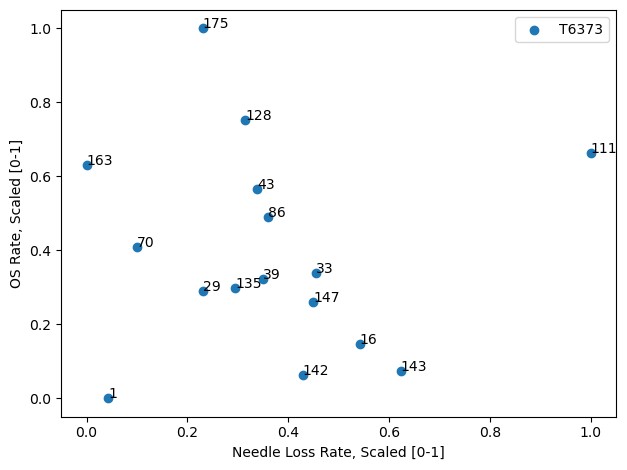

In [147]:
text = data.index.to_list()

plt.figure()
plt.scatter(x = data['Loss Rate'], y = data['OS Rate'], label='T6373')
plt.xlabel('Needle Loss Rate, Scaled [0-1]')
plt.ylabel('OS Rate, Scaled [0-1]')

for i, idx in enumerate(text):
    plt.annotate(text[i], (data.loc[idx, 'Loss Rate'], data.loc[idx, 'OS Rate']))

plt.legend()
plt.tight_layout()
plt.savefig('Monitor.png', dpi=300)
plt.show()
